#### VARIABLES

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import glob
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests

In [2]:
basepath = "dades_tfg/data"
demographics = pd.read_csv(os.path.join(basepath, "demographics.csv"))
demographics_N = pd.read_csv(os.path.join(basepath, "demographics_N.csv"))
nodes = pd.read_csv(os.path.join(basepath, "nodes.csv"))
basepath_FA = os.path.join(basepath, "FA")
basepath_GM = os.path.join(basepath, "GM")
basepath_RS = os.path.join(basepath, "RS")

In [3]:
filenames = ["{:04d}.csv".format(x) for x in demographics["id"]]
filenames

['0000.csv',
 '0001.csv',
 '0002.csv',
 '0003.csv',
 '0004.csv',
 '0005.csv',
 '0006.csv',
 '0007.csv',
 '0008.csv',
 '0009.csv',
 '0010.csv',
 '0011.csv',
 '0012.csv',
 '0013.csv',
 '0014.csv',
 '0015.csv',
 '0016.csv',
 '0017.csv',
 '0018.csv',
 '0019.csv',
 '0020.csv',
 '0021.csv',
 '0022.csv',
 '0023.csv',
 '0024.csv',
 '0025.csv',
 '0026.csv',
 '0027.csv',
 '0028.csv',
 '0029.csv',
 '0030.csv',
 '0031.csv',
 '0032.csv',
 '0033.csv',
 '0034.csv',
 '0035.csv',
 '0036.csv',
 '0037.csv',
 '0038.csv',
 '0039.csv',
 '0040.csv',
 '0041.csv',
 '0042.csv',
 '0043.csv',
 '0044.csv',
 '0045.csv',
 '0046.csv',
 '0047.csv',
 '0048.csv',
 '0049.csv',
 '0050.csv',
 '0051.csv',
 '0052.csv',
 '0053.csv',
 '0054.csv',
 '0055.csv',
 '0056.csv',
 '0057.csv',
 '0058.csv',
 '0059.csv',
 '0060.csv',
 '0061.csv',
 '0062.csv',
 '0063.csv',
 '0064.csv',
 '0065.csv',
 '0066.csv',
 '0067.csv',
 '0068.csv',
 '0069.csv',
 '0070.csv',
 '0071.csv',
 '0072.csv',
 '0073.csv',
 '0074.csv',
 '0075.csv',
 '0076.csv',

In [4]:
data_FA = np.zeros(shape=(len(filenames), 76, 76))
data_GM = np.zeros(shape=(len(filenames), 76, 76))
data_RS = np.zeros(shape=(len(filenames), 76, 76))

In [5]:
for i, filename in enumerate(filenames):
    df_FA = pd.read_csv(os.path.join(basepath_FA, filename), header=None)
    data_FA[i,:,:] = df_FA.values
    
    df_GM = pd.read_csv(os.path.join(basepath_GM, filename), header=None)
    data_GM[i,:,:] = df_GM.values
    
    df_RS = pd.read_csv(os.path.join(basepath_RS, filename), header=None)
    data_RS[i,:,:] = df_RS.values

In [6]:
basepath_FA_N = "dades_tfg/data/Naples/DTI_networks"
basepath_GM_N = "dades_tfg/data/Naples/GM_networks"
basepath_RS_N = "dades_tfg/data/Naples/rsfmri_networks"

# Listar nombres de archivos CSV en cada carpeta
filenames_FA_N = sorted([f for f in os.listdir(basepath_FA_N) if f.endswith('.csv')])
filenames_GM_N = sorted([f for f in os.listdir(basepath_GM_N) if f.endswith('.csv')])
filenames_RS_N = sorted([f for f in os.listdir(basepath_RS_N) if f.endswith('.csv')])

In [7]:
# Inicializar arrays para almacenar los datos
data_FA_N = np.zeros((len(filenames_FA_N), 76, 76))  
data_GM_N = np.zeros((len(filenames_GM_N), 76, 76))
data_RS_N = np.zeros((len(filenames_RS_N), 76, 76))

In [8]:
# FA
for i, filename in enumerate(filenames_FA_N):
    df_FA_N = pd.read_csv(os.path.join(basepath_FA_N, filename), header=None)
    data_FA_N[i, :, :] = df_FA_N.values

#  GM
for i, filename in enumerate(filenames_GM_N):
    df_GM_N = pd.read_csv(os.path.join(basepath_GM_N, filename), header=None)
    data_GM_N[i, :, :] = df_GM_N.values

#  RS
for i, filename in enumerate(filenames_RS_N):
    df_RS_N = pd.read_csv(os.path.join(basepath_RS_N, filename), header=None)
    data_RS_N[i, :, :] = df_RS_N.values

In [9]:
num_samples_FA = len(data_FA)
num_samples_FA_N = len(data_FA_N)
num_samples_GM = len(data_FA)
num_samples_GM_N = len(data_FA_N)
num_samples_RS = len(data_FA)
num_samples_RS_N = len(data_FA_N)


data_FA_combined = np.zeros((num_samples_FA + num_samples_FA_N, 76, 76))  
data_FA_combined[:num_samples_FA, :, :] = data_FA
data_FA_combined[num_samples_FA:, :, :] = data_FA_N


data_GM_combined = np.zeros((num_samples_GM + num_samples_GM_N, 76, 76))  
data_GM_combined[:num_samples_GM, :, :] = data_GM
data_GM_combined[num_samples_GM:, :, :] = data_GM_N


data_RS_combined = np.zeros((num_samples_RS + num_samples_RS_N, 76, 76))  
data_RS_combined[:num_samples_RS, :, :] = data_RS
data_RS_combined[num_samples_RS:, :, :] = data_RS_N

### ANÀLISI DESCRIPTIU

In [10]:
control_indices = demographics_N[demographics_N['mstype'] == -1].index
patient_indices = demographics_N[demographics_N['mstype'] >= 0].index

In [11]:
mean_FA_control = np.mean(data_FA_combined[control_indices, :, :], axis=0)
mean_FA_patient = np.mean(data_FA_combined[patient_indices, :, :], axis=0)
mean_GM_control = np.mean(data_GM_combined[control_indices, :, :], axis=0)
mean_GM_patient = np.mean(data_GM_combined[patient_indices, :, :], axis=0)
mean_RS_control = np.mean(data_RS_combined[control_indices, :, :], axis=0)
mean_RS_patient = np.mean(data_RS_combined[patient_indices, :, :], axis=0)

In [12]:
def plot_heatmap(matrix, title):
    plt.figure(figsize=(10, 8))
    mask = np.triu(np.ones_like(matrix, dtype=bool))
    sns.heatmap(matrix, mask = mask, annot=False, cmap='coolwarm',
                cbar_kws={"shrink": .5}, linewidths=.5, linecolor='gray')
    plt.title(title)
    plt.show()

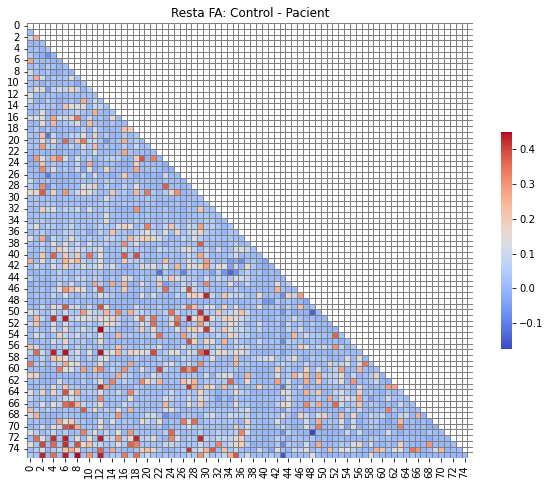

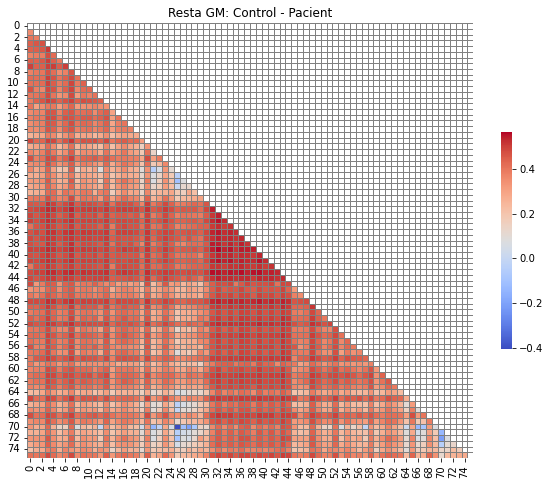

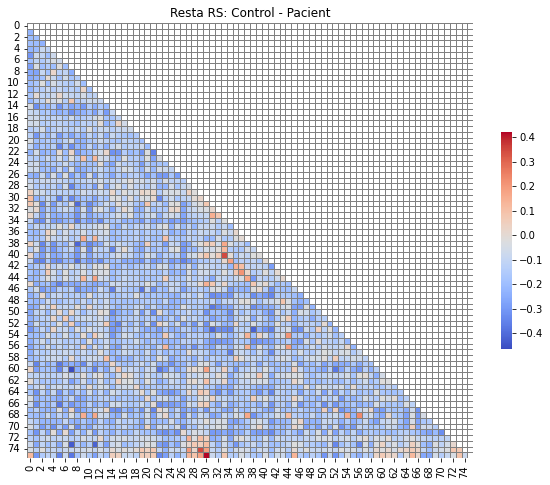

In [13]:
plot_heatmap(mean_FA_control - mean_FA_patient, "Resta FA: Control - Pacient")
plot_heatmap(mean_GM_control - mean_GM_patient, "Resta GM: Control - Pacient")
plot_heatmap(mean_RS_control - mean_RS_patient, "Resta RS: Control - Pacient")

#### CONNECTIVITAT

In [14]:
controls_FA = data_FA_combined[control_indices, :, :]
patients_FA = data_FA_combined[patient_indices, :, :]
controls_GM = data_GM_combined[control_indices, :, :]
patients_GM = data_GM_combined[patient_indices, :, :]
controls_RS = data_RS_combined[control_indices, :, :]
patients_RS = data_RS_combined[patient_indices, :, :]
p_values_FA = np.zeros((76, 76))
p_values_GM = np.zeros((76, 76))
p_values_RS = np.zeros((76, 76))

In [15]:
for i in range(76):
    for j in range(i + 1, 76):  # simetría
        _, p_val = stats.ttest_ind(controls_FA[:, i, j], patients_FA[:, i, j])
        p_values_FA[i, j] = p_val
        p_values_FA[j, i] = p_val

        _, p_val = stats.ttest_ind(controls_GM[:, i, j], patients_GM[:, i, j])
        p_values_GM[i, j] = p_val
        p_values_GM[j, i] = p_val

        _, p_val = stats.ttest_ind(controls_RS[:, i, j], patients_RS[:, i, j])
        p_values_RS[i, j] = p_val
        p_values_RS[j, i] = p_val

In [16]:
def plot_heatmap(p_values, title): #,alpha_corrected
    plt.figure(figsize=(10, 8))
    mask = np.triu(np.ones_like(p_values, dtype=bool))
    sns.heatmap(p_values, mask = mask, cmap='viridis_r', annot=False,
                cbar_kws={"shrink": .5}, linewidths=.5, linecolor='gray')  #,vmax=alpha_corrected
    plt.title(title)
    plt.show()

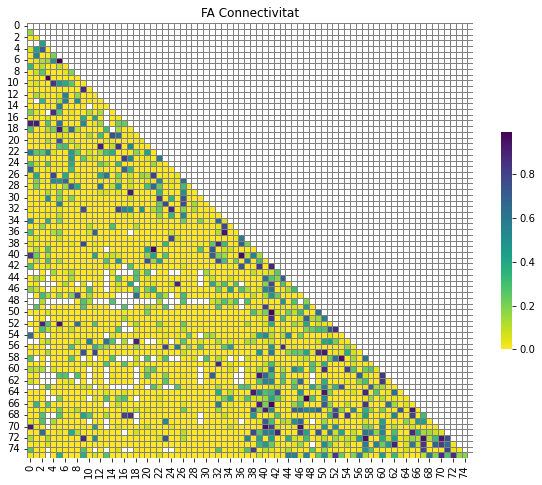

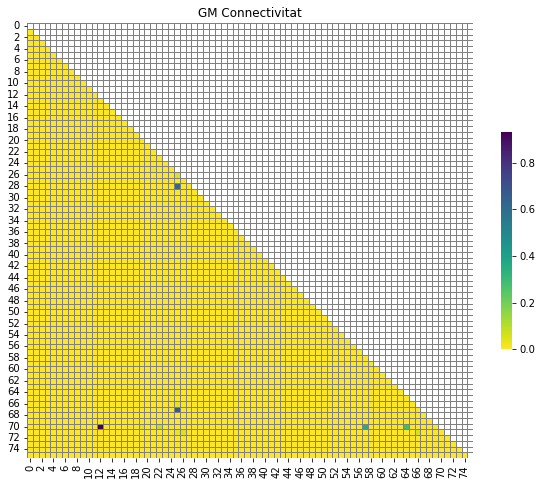

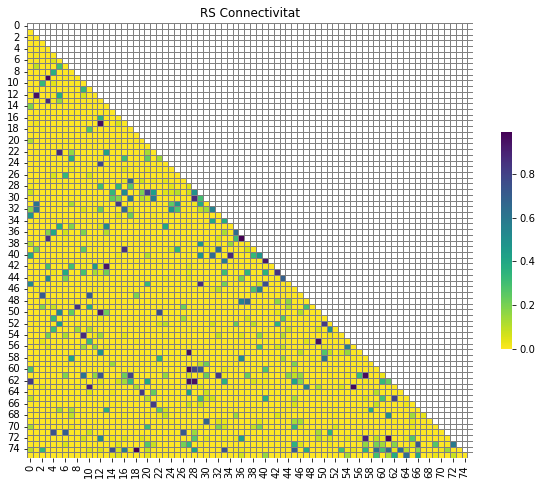

In [17]:
plot_heatmap(p_values_FA, 'FA Connectivitat')  #, alpha_corrected=0.001
plot_heatmap(p_values_GM, 'GM Connectivitat')  #, alpha_corrected=0.01
plot_heatmap(p_values_RS, 'RS Connectivitat')  #, alpha_corrected=0.01

#### HISTOGRAMES

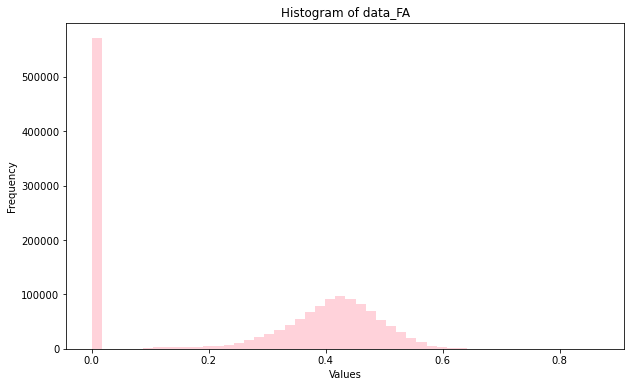

In [18]:
flattened_data_FA = data_FA_combined.flatten()
plt.figure(figsize=(10, 6))
plt.hist(flattened_data_FA, bins=50, color='pink', alpha=0.7)
plt.title('Histogram of data_FA')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

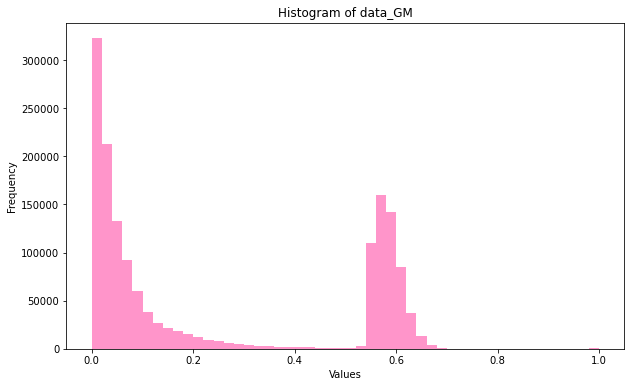

In [19]:
flattened_data_GM = data_GM_combined.flatten()
plt.figure(figsize=(10, 6))
plt.hist(flattened_data_GM, bins=50, color='hotpink', alpha=0.7)
plt.title('Histogram of data_GM')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

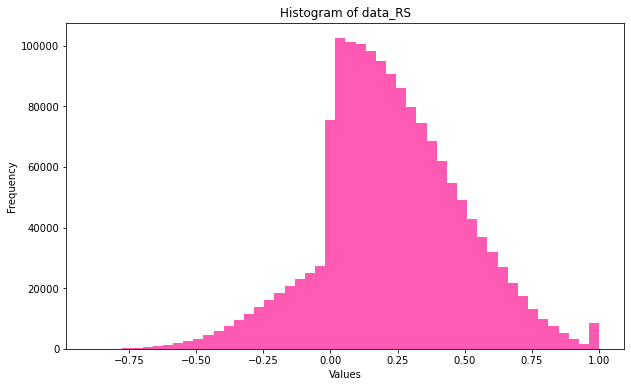

In [20]:
flattened_data_RS = data_RS_combined.flatten()
plt.figure(figsize=(10, 6))
plt.hist(flattened_data_RS, bins=50, color='deeppink', alpha=0.7)
plt.title('Histogram of data_RS')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()